In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv('1_boston_housing.csv')

In [3]:
# Assume the target column is named 'MEDV'
X = data.drop("MEDV", axis=1)
Y = data["MEDV"]

In [4]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
data.shape

(506, 14)

In [6]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [9]:
# Build the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression

In [10]:
# Compile the model
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [12]:
# Train the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/100
404/404 [==============================] - 1s 2ms/step - loss: 2.0538 - mae: 1.0717 - val_loss: 12.5132 - val_mae: 2.3683
Epoch 2/100
404/404 [==============================] - 1s 2ms/step - loss: 1.7714 - mae: 0.9904 - val_loss: 11.8717 - val_mae: 2.2142
Epoch 3/100
404/404 [==============================] - 1s 2ms/step - loss: 1.9797 - mae: 1.0668 - val_loss: 11.7632 - val_mae: 2.1930
Epoch 4/100
404/404 [==============================] - 1s 2ms/step - loss: 1.9508 - mae: 1.0612 - val_loss: 13.7847 - val_mae: 2.4701
Epoch 5/100
404/404 [==============================] - 1s 2ms/step - loss: 1.7239 - mae: 1.0017 - val_loss: 11.8704 - val_mae: 2.1563
Epoch 6/100
404/404 [==============================] - 1s 2ms/step - loss: 1.5194 - mae: 0.9107 - val_loss: 13.1298 - val_mae: 2.3165
Epoch 7/100
404/404 [==============================] - 1s 2ms/step - loss: 2.0459 - mae: 1.0330 - val_loss: 11.7413 - val_mae: 2.0962
Epoch 8/100
404/404 [==============================] - 1s 2ms/

KeyboardInterrupt: 

In [13]:
# Evalute the model
mse = model.evaluate(X_test, Y_test)
print("Mean Squared Error:", mse)

4/4 [==============================] - 0s 3ms/step - loss: 14.0374 - mae: 2.4981
Mean Squared Error: [14.037423133850098, 2.4981300830841064]


In [14]:
# Predictions
y_pred = model.predict(X_test)
print(y_pred[:5])

4/4 [==============================] - 0s 2ms/step
[[27.814276]
 [32.332047]
 [15.614571]
 [23.700825]
 [19.027985]]


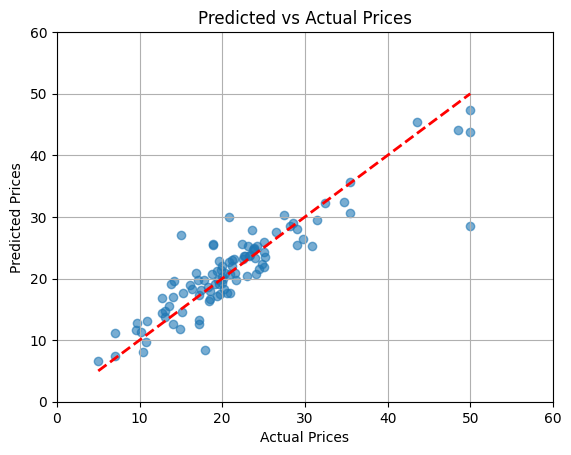

In [15]:
# Visualizing Predicted vs Actual Pricesplt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred, alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.title('Predicted vs Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.xlim([0, 60])
plt.ylim([0, 60])
plt.grid()
plt.show()